# Fashion Class Classification

## 1. Introduction
Through plenty of Instagram pictures, it is possible to use machine learning or deep learning techniques to recognize image, detecting fashion trends and conducting marketing campaigns.

From the MNIST dataset, there is a suitable example to train such a classifier.

Usually, "regular" machine learning models **CANNOT** tackle image recognition. Hence, in this project we mainly focus on building a **neural network** to solve it.

### Data Scource
Datasets are avaliable on [Kaggle](https://www.kaggle.com/zalando-research/fashionmnist) or can be imported from [keras](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data)

### Datasets
Two datasets can be input. Training set and testing set.

Number of instances in training set: **60000**

Number of instances in testing set: **10000**

where each instance contains an **8-bit image**

Number of attributes: **784** (each represented by a pixel value (an integer between 0 and 255) in a 28*28 grayscale image)

**Labels** (encoded from 0 to 9):
- 0 => T-shirt/top
- 1 => Trouser
- 2 => Pullover
- 3 => Dress
- 4 => Coat
- 5 => Sandal
- 6 => Shirt
- 7 => Sneaker
- 8 => Bag
- 9 => Ankle boot

### Task
Classify fasion images into **10 labels**.

# 2. Data Import

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# If there is not csv, data can be imported from here
from keras.datasets.mnist import load_data

In [3]:
# Constants
NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10

In [4]:
# (X_train, y_train), (X_test, y_test) = load_data()

In [5]:
# X_train.shape

In [6]:
# y_train.shape

In [7]:
# X_test.shape

In [8]:
# y_test.shape

In [9]:
df_train = pd.read_csv('datasets/fashion-mnist_train.csv')
df_test = pd.read_csv('datasets/fashion-mnist_test.csv')

In [10]:
# Datasets overview
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_train.shape

(60000, 785)

In [12]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_test.shape

(10000, 785)

In [14]:
# Reshape csv to array that we can apply image visualization
train = np.array(df_train, dtype='int')
test = np.array(df_test, dtype='int')

In [15]:
train, test

(array([[2, 0, 0, ..., 0, 0, 0],
        [9, 0, 0, ..., 0, 0, 0],
        [6, 0, 0, ..., 0, 0, 0],
        ...,
        [8, 0, 0, ..., 0, 0, 0],
        [8, 0, 0, ..., 0, 0, 0],
        [7, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [2, 0, 0, ..., 0, 0, 0],
        ...,
        [8, 0, 0, ..., 0, 1, 0],
        [8, 0, 1, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]]))

# 2. Data Visualization

[Documentation](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html) of showing images, taking the first and the last image as examples. Input should be a square matrix.

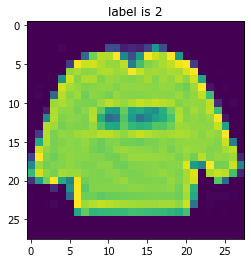

In [16]:
plt.imshow(train[0, 1:].reshape(NUM_ROWS, NUM_COLS))
plt.title('label is ' + str(train[0,0]), fontsize=12)
plt.show()

This image is a pullover. Try another one.

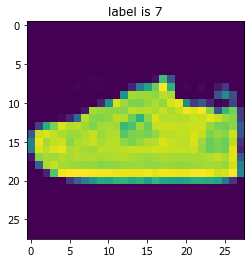

In [17]:
plt.imshow(train[-1, 1:].reshape(NUM_ROWS, NUM_COLS))
plt.title('label is ' + str(train[-1,0]), fontsize=12)
plt.show()

This image is a sneaker

Method of how to [visualize image in a matrix](https://www.kaggle.com/faressayah/fashion-mnist-classification-using-cnns)

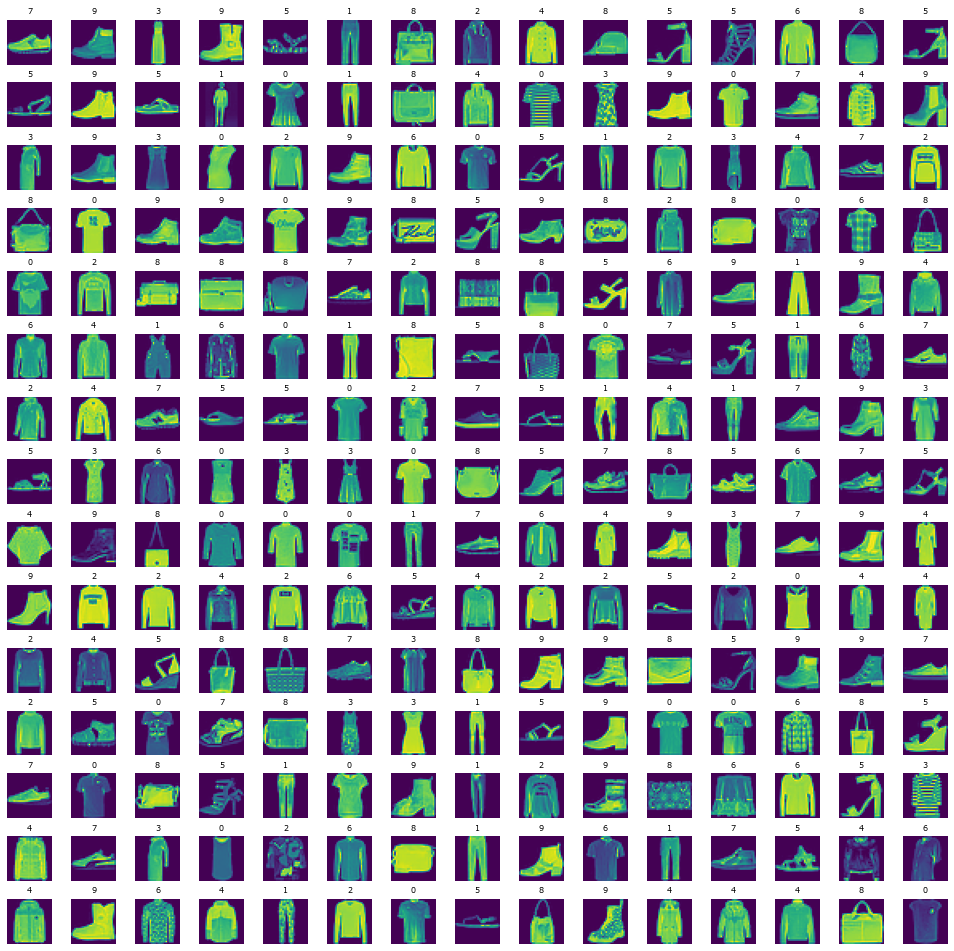

In [18]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(train[index,1:].reshape((28,28)), cmap='viridis')
    axes[i].set_title(train[index,0], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# 3. Model Building

Apply [normalization](https://en.wikipedia.org/wiki/Normalization_(image_processing)), making pixel values belonging to the domain of activation functions.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Prepare the training and testing dataset (in array format)
X_train = train[:,1:]/255
y_train = train[:,0]

X_test = test[:,1:]/255
y_test = test[:,0]

In [21]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [22]:
# Reshape arrays into image format, where they can feed convolutional neural network
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [23]:
X_train.shape, X_test.shape, X_validate.shape

((48000, 28, 28, 1), (10000, 28, 28, 1), (12000, 28, 28, 1))

In [24]:
X_train.shape, X_test.shape, X_validate.shape

((48000, 28, 28, 1), (10000, 28, 28, 1), (12000, 28, 28, 1))

In [25]:
# Import neural network libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [26]:
cnn = Sequential()

In [27]:
# Add input layer
# 64 feature detectors, dimension in 3*3
cnn.add(Conv2D(64, 3, 3, input_shape=(NUM_ROWS, NUM_COLS, 1), activation='relu'))

In [28]:
# Add pooling layer, where pool size is in default 2*2
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [29]:
# Flatten model
cnn.add(Flatten())

In [30]:
# Add a hidden layer
cnn.add(Dense(32, activation='relu'))

In [31]:
# Add another hidden layer, output 10 target classes to the final result
cnn.add(Dense(10, activation='sigmoid'))

In [32]:
cnn.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics =['accuracy'])

In [33]:
cnn.fit(X_train, 
        y_train,
        batch_size=512,
        epochs=50,
        verbose=1,
        validation_data=(X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 3s 31ms/step - loss: 1.3530 - accuracy: 0.5304 - val_loss: 0.7264 - val_accuracy: 0.7408
Epoch 2/50
94/94 [==============================] - 3s 29ms/step - loss: 0.6597 - accuracy: 0.7616 - val_loss: 0.6053 - val_accuracy: 0.7807
Epoch 3/50
94/94 [==============================] - 3s 29ms/step - loss: 0.5829 - accuracy: 0.7893 - val_loss: 0.5484 - val_accuracy: 0.8033
Epoch 4/50
94/94 [==============================] - 3s 29ms/step - loss: 0.5422 - accuracy: 0.8030 - val_loss: 0.5283 - val_accuracy: 0.8087
Epoch 5/50
94/94 [==============================] - 3s 29ms/step - loss: 0.5141 - accuracy: 0.8151 - val_loss: 0.4943 - val_accuracy: 0.8217
Epoch 6/50
94/94 [==============================] - 3s 29ms/step - loss: 0.4916 - accuracy: 0.8233 - val_loss: 0.4768 - val_accuracy: 0.8295
Epoch 7/50
94/94 [==============================] - 3s 29ms/step - loss: 0.4745 - accuracy: 0.8294 - val_loss: 0.4616 - val_accuracy: 0.8323
Epoch 8/50
94

# 4. Model Evaluation

In [34]:
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy:', evaluation[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.3368 - accuracy: 0.8755
Test Accuracy: 0.8755000233650208


In [35]:
# Get predictions
y_pred = np.argmax(cnn.predict(X_test), axis=1)

In [36]:
y_pred

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

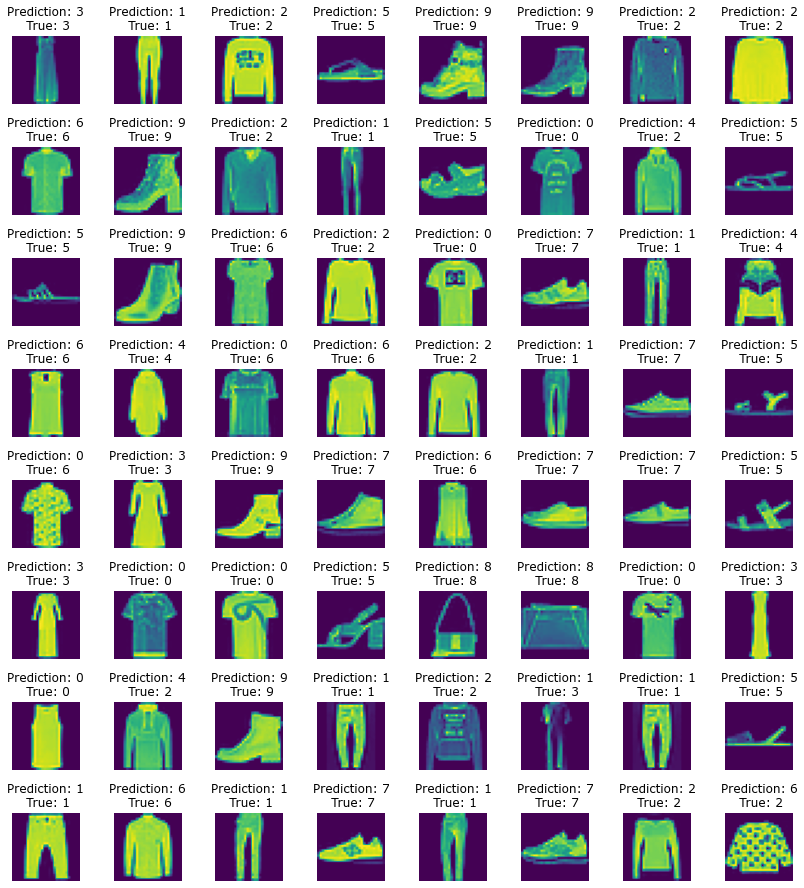

In [37]:
# Overview 64 images for model performance
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize=(14,16))
axes = axes.ravel() 

for i in np.arange(0, L * W):
    
    index = np.random.randint(0, len(y_pred))
    axes[i].imshow(X_test[index].reshape(28,28), cmap='viridis')
    axes[i].set_title("Prediction: {}\n True: {}".format(y_pred[index], y_test[index]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

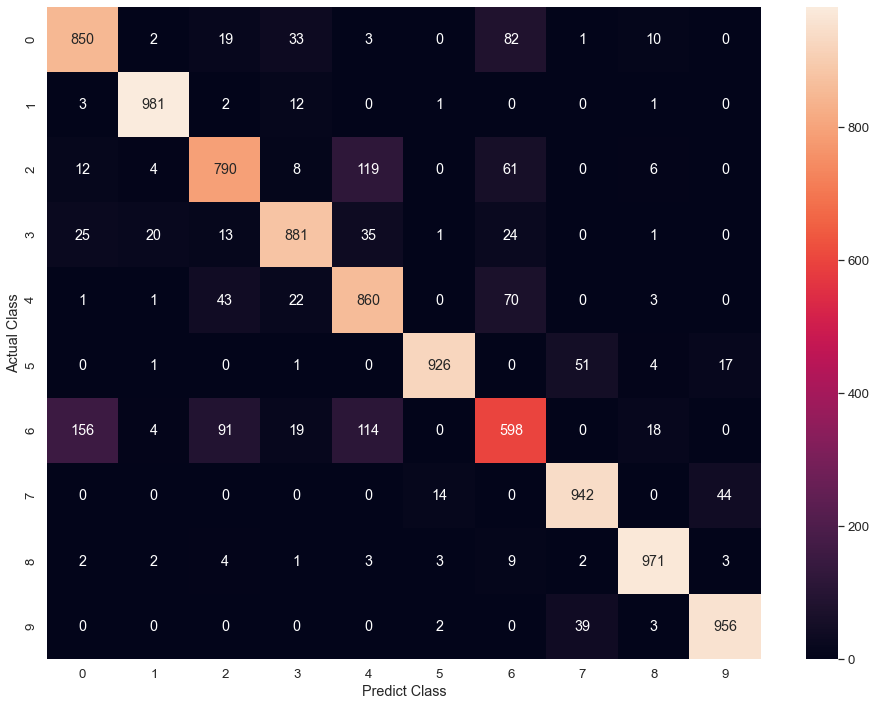

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.2)
plt.figure(figsize=(16,12))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predict Class')
plt.ylabel('Actual Class')
plt.show()

Diagonal elements are TPs

In [39]:
from sklearn.metrics import classification_report


target_names = ["Class {}".format(i) for i in range(NUM_CLASSES)]

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.81      0.85      0.83      1000
     Class 1       0.97      0.98      0.97      1000
     Class 2       0.82      0.79      0.81      1000
     Class 3       0.90      0.88      0.89      1000
     Class 4       0.76      0.86      0.81      1000
     Class 5       0.98      0.93      0.95      1000
     Class 6       0.71      0.60      0.65      1000
     Class 7       0.91      0.94      0.93      1000
     Class 8       0.95      0.97      0.96      1000
     Class 9       0.94      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.87      0.88      0.87     10000
weighted avg       0.87      0.88      0.87     10000



Firstly we recall labels:
- 0 => T-shirt/top
- 1 => Trouser
- 2 => Pullover
- 3 => Dress
- 4 => Coat
- 5 => Sandal
- 6 => Shirt
- 7 => Sneaker
- 8 => Bag
- 9 => Ankle boot

### Brief Analysis:
- Class 6 (shirt) is the one which has been mostly misclassified
- Difference between shirt, coat, pullover could be small. Hence, it is easily for the model to mistake it.